In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Bu Python Code Yunus Karagün Tarafından Yazılmıştır. Tüm Hakları Saklıdır. (V2.Stable (01.09.2021))

dosya=47 #kasa dosyası
gun=31 #aydaki gün sayısı Yazılacak
ay="10" #hangi ay olduğu
yil="2021"
loc = ("D:\\Python\\" + ay + "\\") #dosyaların bulunduğu adres
N_Gunu = str(gun).zfill(2)+"."+ ay + "."+ yil #"08.09.2021" #Raporda Çıkması istenen Tarih


magaza_kasa = pd.read_excel("Adresler.xlsx",  index_col=0)

kodlar = pd.read_excel("Anahtar.xlsx",  sheet_name= "KF", index_col=None) #Kasa Kodları

hucre = magaza_kasa["Adres"]

sayfalar = []  #excel dosyasındaki tarih olan sayfa adlarından oluşan bir liste yapıyoruz.
for gn in range (1, gun+1):
    sayfalar.append((str(gn).zfill(2)+"."+ ay + "."+ yil))
    
for dsy in range (1, dosya+1):
    ciro = pd.read_excel(loc + str(dsy).zfill(3) + ".xlsx",
                      sheet_name=sayfalar,
                      skiprows = 2, nrows = 65, header = None, index_col=None, usecols=[0, 1, 2, 3, 4, 5, 6, 7])

    for g in range (0, gun):
        gunluk_kasa = []
        gunluk_kasa.append(list(ciro.keys())[g])
        for i in range (1, 67):
            aa=ciro[list(ciro.keys())[g]].iloc[eval(hucre[i])]
            gunluk_kasa.append(aa)  
        magaza_kasa[str(dsy).zfill(2) + "-" + str(g+1).zfill(2)] = gunluk_kasa     

magaza_kasa_T = magaza_kasa.T
magaza_kasa_T['MAĞAZA ADI'] = magaza_kasa_T['MAĞAZA ADI'].str.strip()
magaza_kasa_T = magaza_kasa_T.merge(kodlar,
                                      on ='MAĞAZA ADI', how="left").set_axis(magaza_kasa_T.index)


# Yatırlan Nakitler Bölümü

sayfalar = [] 
for i in range (1, gun+1):
    sayfalar.append((str(i).zfill(2)+"."+ ay + "."+ yil))
df2 = pd.DataFrame()
for i in range (1, dosya+1):
    sheets = pd.read_excel(loc + str(i).zfill(3) + ".xlsx",
                      sheet_name=sayfalar,
                      skiprows = 57, nrows = 5, header = 1, index_col=0, usecols=[0, 1, 2, 3, 4, 5, 6])
    
    magaza = pd.read_excel(loc + str(i).zfill(3) + ".xlsx",
                           sheet_name="01." + ay + "."+ yil,
                           skiprows = 2, nrows = 1, header = None, usecols=[5])
    
    dfs = []
    for framename in sheets.keys():
        temp_df = sheets[framename]
        temp_df['Sayfa'] = framename
        dfs.append(temp_df)
    df = pd.concat(dfs)
    df.loc[:,"Dosya Adı"] = str(i).zfill(3) + ".xlsx"
    df.loc[:,"Magaza"] = magaza.at[0, 5]
    
 
    df1 = df.dropna(thresh=4)
    df2 = pd.concat([df2, df1])

df2['Magaza'] = df2['Magaza'].str.strip()

In [3]:
#Genel fark 1 TL'den büyük ve küçük olanlar

g_fark = magaza_kasa_T[["MAĞAZA ADI", "DS-Tarih", "GENEL FARK"]]
g_fark.drop("Adres", inplace=True)
g_fark[(g_fark["GENEL FARK"] < -1) | (g_fark["GENEL FARK"] > 1)]
Nakitler = magaza_kasa_T[["KASA KODU", "MAĞAZA ADI", "DS-Tarih", "FATURALI SATIŞLAR", "GİDER PUSULASI", "CİRO TOPLAMI", "NAKİT_1", "EURO TUTAR", "USD TUTAR", "MASRAF", "NAKİT", "YATIRILAN TL FARK", "YATIRILAN EURO FARK","YATIRILAN USD FARK", "İL"]]
Nakitler.drop("Adres", inplace=True)

Bugun_n = Nakitler[Nakitler["DS-Tarih"] == N_Gunu]
Bugun_n1 = Bugun_n[["DS-Tarih", "KASA KODU", "MAĞAZA ADI", "NAKİT_1", "EURO TUTAR", "USD TUTAR"]]
Nakitler1=Nakitler[["DS-Tarih", "KASA KODU", "MAĞAZA ADI", "NAKİT_1", "EURO TUTAR", "USD TUTAR"]]
with pd.ExcelWriter(N_Gunu+'-x-Rapor.xlsx') as writer:
    magaza_kasa_T.to_excel(writer, sheet_name = 'Raw')   
    Nakitler.to_excel(writer, sheet_name = 'Main')
    Bugun_n.to_excel(writer, sheet_name = N_Gunu)
    Nakitler1.to_excel(writer, sheet_name = 'Main-Nakit')
    Bugun_n1.to_excel(writer, sheet_name = N_Gunu+"-Nakit")
    g_fark[(g_fark["GENEL FARK"] < -1) | (g_fark["GENEL FARK"] > 1)].to_excel(writer, sheet_name = "Hatalı")
    magaza_kasa_T[["MAĞAZA ADI", "DS-Tarih", "NOTLAR"]].dropna().to_excel(writer, sheet_name = "Notlar")
    df2[(df2[["YATIRILAN TL", "YATIRILAN USD", "YATIRILAN EURO"]].sum(axis=1, skipna=True) != 0)].to_excel(writer, sheet_name = "Yatırılan Nakitler")


In [4]:
Bugun_n = Bugun_n[["DS-Tarih", "KASA KODU", "MAĞAZA ADI", "NAKİT_1", "EURO TUTAR", "USD TUTAR"]]

In [5]:
Bugun_n

,DS-Tarih,KASA KODU,MAĞAZA ADI,NAKİT_1,EURO TUTAR,USD TUTAR
01-30,30.09.2021,15.0,Acity Levi's Outlet,929.25,0,0
02-30,30.09.2021,60.0,Acity MB,2427.04,0,0
03-30,30.09.2021,999.0,Acity Panayır,0,0,0
04-30,30.09.2021,67.0,Adana Optimum Outlet,1789.46,0,0
05-30,30.09.2021,54.0,Akasya Levi's,400,0,0
06-30,30.09.2021,77.0,Alanya MB,1053.02,0,295
07-30,30.09.2021,33.0,Ankamall Jepublic,4820.8,0,0
08-30,30.09.2021,2.0,Ankamall Levi's,3604.61,0,0
09-30,30.09.2021,19.0,Ankamall MB,948.27,0,0
10-30,30.09.2021,42.0,Armada Dockers,215.95,0,0


In [5]:
g_fark[(g_fark["GENEL FARK"] < -1) | (g_fark["GENEL FARK"] > 1)]

,MAĞAZA ADI,DS-Tarih,GENEL FARK
18-21,Espark Levi's,21.10.2021,10.0
21-05,İzmir Forum Levi's,05.10.2021,-83.55
21-20,İzmir Forum Levi's,20.10.2021,-1519.8
23-08,İzmit Outlet Levi's,08.10.2021,-900.24
23-10,İzmit Outlet Levi's,10.10.2021,-430.15
28-09,Kuzu MB,09.10.2021,1665.93
37-21,Metropol Levi's,21.10.2021,-899.99


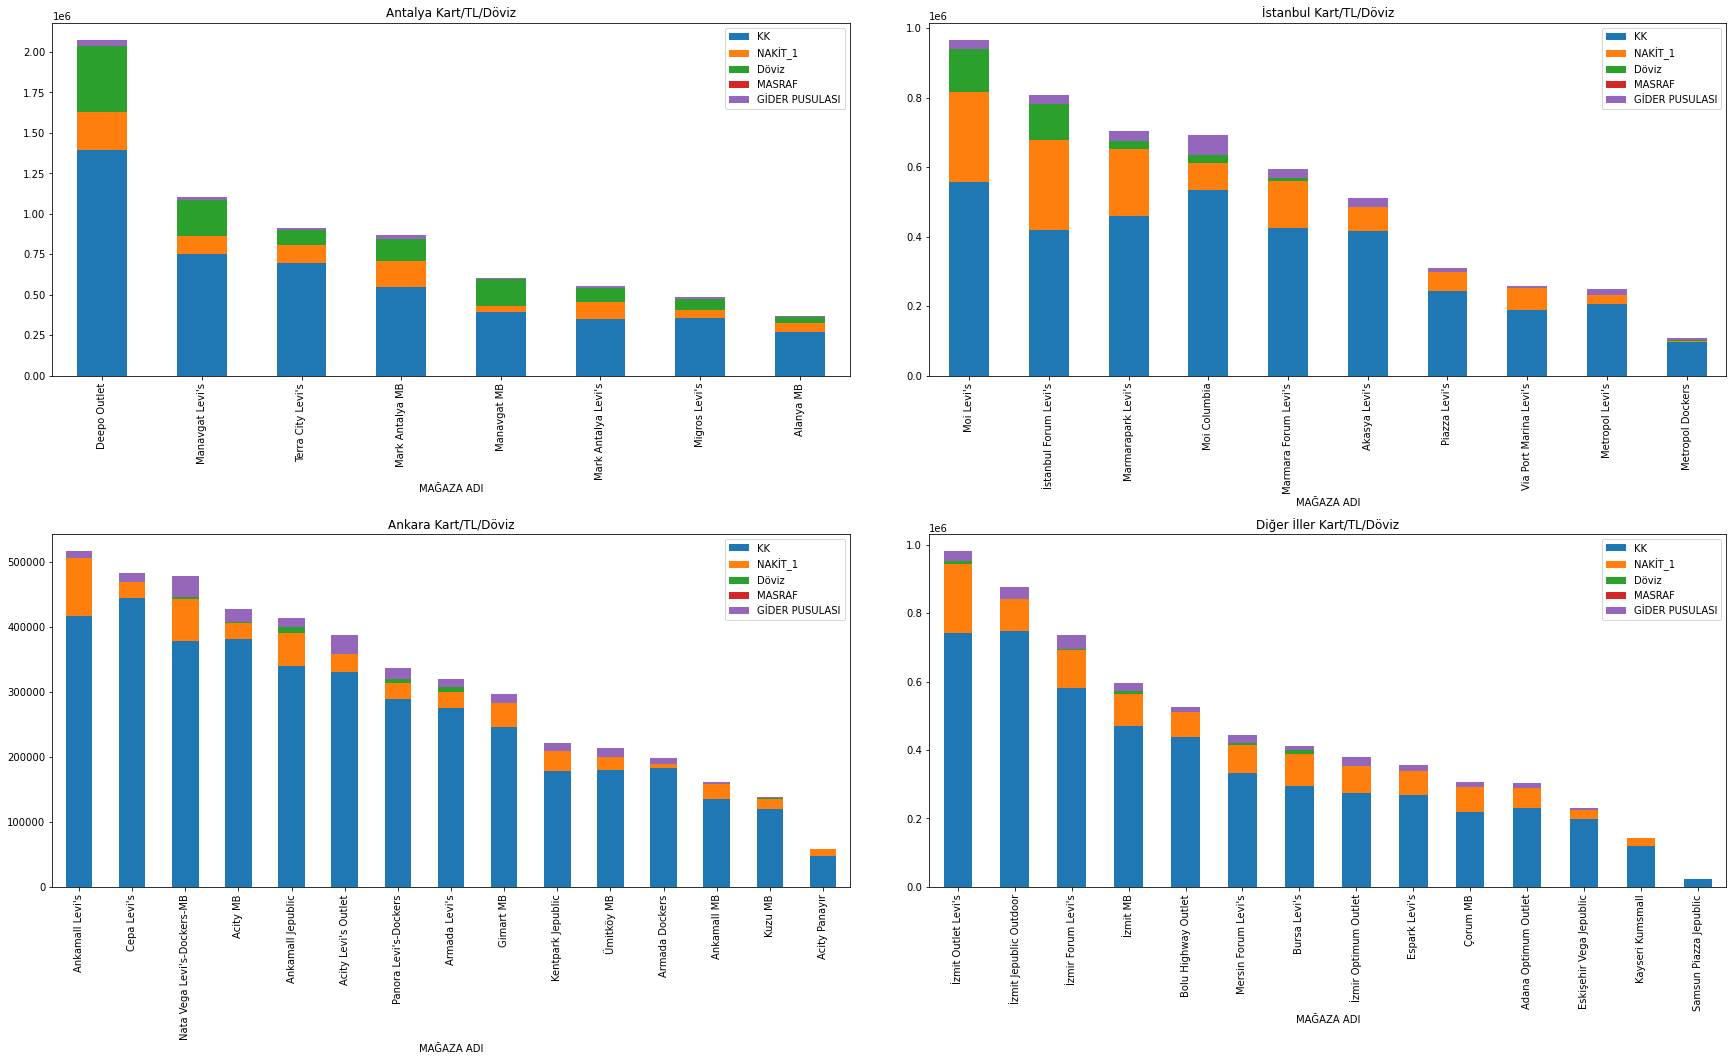

In [6]:
Nakit_Satis = Nakitler.groupby(["MAĞAZA ADI", "İL"]).agg({"CİRO TOPLAMI":"sum","NAKİT":"sum", "NAKİT_1":"sum", "MASRAF":"sum","GİDER PUSULASI":"sum"}).sort_values("CİRO TOPLAMI", ascending=False)
Nakit_Satis["KK"] = Nakit_Satis["CİRO TOPLAMI"]-Nakit_Satis["NAKİT"]
Nakit_Satis["Döviz"] = (Nakit_Satis["NAKİT"]- Nakit_Satis["NAKİT_1"] - Nakit_Satis["MASRAF"]).round(decimals = 2)

Grafik = Nakit_Satis.reset_index(level="İL")
Antalya=Grafik[Grafik["İL"] == "Antalya"]
Istanbul=Grafik[Grafik["İL"] == "İstanbul"]
Ankara=Grafik[Grafik["İL"] == "Ankara"]
Diger=Grafik[(Grafik["İL"] != "Antalya") & (Grafik["İL"] != "Ankara") & (Grafik["İL"] != "İstanbul")]



# Antalya[["GİDER PUSULASI", "KK", "NAKİT_1", "Döviz", "MASRAF"]].plot(kind="bar", figsize=(10, 6),  stacked=True, title='Antalya Kart/TL/Döviz', ylabel='TUTAR')
# Istanbul[["GİDER PUSULASI", "KK", "NAKİT_1", "Döviz", "MASRAF"]].plot(kind="bar", figsize=(10, 6),  stacked=True, title='İstanbul Kart/TL/Döviz', ylabel='TUTAR')
# Ankara[["GİDER PUSULASI", "KK", "NAKİT_1", "Döviz", "MASRAF"]].plot(kind="bar", figsize=(10, 6),  stacked=True, title='Ankara Kart/TL/Döviz', ylabel='TUTAR')
# Diger[["GİDER PUSULASI", "KK", "NAKİT_1", "Döviz", "MASRAF"]].plot(kind="bar", figsize=(10, 6),  stacked=True, title='Diğer İller Kart/TL/Döviz', ylabel='TUTAR')



figure, axes = plt.subplots(2, 2)

Antalya[["KK", "NAKİT_1", "Döviz", "MASRAF", "GİDER PUSULASI"]].plot(ax=axes[0, 0], kind="bar", figsize=(30, 15), stacked=True, title='Antalya Kart/TL/Döviz')
Istanbul[["KK", "NAKİT_1", "Döviz", "MASRAF", "GİDER PUSULASI"]].plot(ax=axes[0, 1], kind="bar", figsize=(30, 15), stacked=True, title='İstanbul Kart/TL/Döviz')
Ankara[["KK", "NAKİT_1", "Döviz", "MASRAF", "GİDER PUSULASI"]].plot(ax=axes[1, 0], kind="bar", figsize=(30, 15), stacked=True, title='Ankara Kart/TL/Döviz')
Diger[["KK", "NAKİT_1", "Döviz", "MASRAF", "GİDER PUSULASI"]].plot(ax=axes[1, 1], kind="bar", figsize=(30,15), stacked=True, title='Diğer İller Kart/TL/Döviz')

figure.subplots_adjust(left=0.125,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.1, 
                    hspace=0.45)


{'Agency FB',
 'Algerian',
 'Arial',
 'Arial Nova',
 'Arial Rounded MT Bold',
 'Bahnschrift',
 'Baskerville Old Face',
 'Bauhaus 93',
 'Bell MT',
 'Berlin Sans FB',
 'Berlin Sans FB Demi',
 'Bernard MT Condensed',
 'Blackadder ITC',
 'Bodoni MT',
 'Book Antiqua',
 'Bookman Old Style',
 'Bookshelf Symbol 7',
 'Bradley Hand ITC',
 'Britannic Bold',
 'Broadway',
 'Brush Script MT',
 'Calibri',
 'Californian FB',
 'Calisto MT',
 'Cambria',
 'Candara',
 'Castellar',
 'Centaur',
 'Century',
 'Century Gothic',
 'Century Schoolbook',
 'Chiller',
 'Colonna MT',
 'Comic Sans MS',
 'Consolas',
 'Constantia',
 'Cooper Black',
 'Copperplate Gothic Bold',
 'Copperplate Gothic Light',
 'Corbel',
 'Courier New',
 'Curlz MT',
 'DejaVu Sans',
 'DejaVu Sans Display',
 'DejaVu Sans Mono',
 'DejaVu Serif',
 'DejaVu Serif Display',
 'Dubai',
 'Ebrima',
 'Edwardian Script ITC',
 'Elephant',
 'Engravers MT',
 'Eras Bold ITC',
 'Eras Demi ITC',
 'Eras Light ITC',
 'Eras Medium ITC',
 'Felix Titling',
 'Footlig

In [16]:
figure.savefig('20210930_Nakit_doviz.pdf')

In [31]:
from matplotlib.backends.backend_pdf import PdfPages

In [20]:
figure.savefig('Nakit_doviz.pdf',
                bbox_inches="tight")

In [181]:
Grafik[Grafik["İL"] == "Antalya"]

,İL,CİRO TOPLAMI,NAKİT,NAKİT_1,MASRAF,KK,Döviz
MAĞAZA ADI,,,,,,,
Deepo Outlet,Antalya,370534.53,137821.30,56229.20,0.0,232713.23,81592.10
Manavgat Levi's,Antalya,187087.84,90242.88,26913.88,0.0,96844.96,63329.00
Terra City Levi's,Antalya,135384.57,40665.73,24825.98,0.0,94718.84,15839.75
Manavgat MB,Antalya,132168.75,54422.23,11886.03,0.0,77746.52,42536.20
Mark Antalya MB,Antalya,124397.69,58283.22,39490.22,0.0,66114.47,18793.00
Migros Levi's,Antalya,93176.12,19384.51,12744.51,0.0,73791.61,6640.00
Mark Antalya Levi's,Antalya,89788.76,39085.16,26512.16,0.0,50703.60,12573.00
Alanya MB,Antalya,57121.03,22114.11,12944.81,130.0,35006.92,9039.30


In [24]:
Nakit_Satis["GİDER PUSULASI-Yüzde"] = Nakit_Satis["GİDER PUSULASI"]/Nakit_Satis["CİRO TOPLAMI"]*100

In [25]:
Nakit_Satis.sort_values("GİDER PUSULASI-Yüzde", ascending=False)

,,CİRO TOPLAMI,NAKİT,NAKİT_1,MASRAF,GİDER PUSULASI,KK,Döviz,GİDER PUSULASI-Yüzde
MAĞAZA ADI,İL,,,,,,,,
Cepa Jepublic,Ankara,4780.910,1434.75,1154.75,0.00,1383.01,3346.160,280.00,28.927756
Acity Levi's Outlet,Ankara,228138.870,20790.15,15261.99,80.00,21983.27,207348.720,5448.16,9.635916
İzmir Forum Levi's,İzmir,413269.830,83626.93,83426.94,0.00,33457.38,329642.900,199.99,8.095771
Moi Columbia,İstanbul,200752.840,53987.86,45159.84,196.02,15772.32,146764.980,8632.00,7.856586
Adana Optimum Outlet,Adana,111751.900,39491.28,39441.28,50.00,8440.52,72260.620,0.00,7.552910
Piazza Levi's,İstanbul,170304.520,26215.75,25395.86,0.00,12806.36,144088.770,819.89,7.519683
Panora Levi's-Dockers,Ankara,221270.660,25356.99,24557.00,0.00,15285.87,195913.670,799.99,6.908223
Kentpark Jepublic,Ankara,124102.240,17371.55,17259.62,0.00,8303.48,106730.690,111.93,6.690838
Eskişehir Vega Jepublic,Eskişehir,139832.540,27561.29,25999.38,0.00,8872.87,112271.250,1561.91,6.345354
